# Install Dependencies


In [ ]:
!pip install tensorflow keras tensorflow-hub==0.13.0 tensorflow-text==2.15.0
!pip install tensorflow==2.15.0 keras==2.15 tensorflow-hub==0.13.0 tensorflow-text==2.15.0
!pip install datasets
!pip -q install evaluate
!pip install imbalanced-learn
# !pip install torch torchvision torchaudio

!pip install transformers datasets scikit-learn



# Import Libraries

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.layers import Input

import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch


# Tensor Flow

import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Check if libraries are installed and print their versions
try:
    print(f"TensorFlow Hub Version: {hub.__version__}")
except ImportError:
    print("TensorFlow Hub is not installed.")

try:
    print(f"TensorFlow Text Version: {text.__version__}")
except ImportError:
    print("TensorFlow Text is not installed.")

try:
    print(f"TensorFlow Version: {tf.__version__}")
except ImportError:
    print("TensorFlow is not installed.")

try:
    print(f"pandas Version: {pd.__version__}")
except ImportError:
    print("pandas is not installed.")

try:
    print(f"scikit-learn Version: {train_test_split.__module__.split('.')[0]}")
except ImportError:
    print("scikit-learn is not installed.")

try:
    print(f"scikit-learn Version: {classification_report.__module__.split('.')[0]}")
except ImportError:
    print("scikit-learn is not installed.")

#other usefull

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler


TensorFlow Hub Version: 0.13.0
TensorFlow Text Version: 2.15.0
TensorFlow Version: 2.15.0
pandas Version: 2.2.3
scikit-learn Version: sklearn
scikit-learn Version: sklearn


# Import Github

In [22]:
!git clone https://github.com/tajuar-akash-hub/Datasets.git

fatal: destination path 'Datasets' already exists and is not an empty directory.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


# Dataset Location

In [23]:
my_df_loc = '/kaggle/working/Datasets/sentence_without_gemini.csv'

# BioBERT 

In [24]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [38]:
# Assuming `data` contains your dataset with 'Generated Sentence' and 'Fraud_status' columns
from sklearn.model_selection import train_test_split

import pandas as pd

# Load the dataset
data = pd.read_csv(my_df_loc)
data.head(2)


,generated_sentence_without_gemini,ClaimLegitimacy,fraud_status
0,"On 2024-07-08 00:00:00, a claim of $7820.52 wa...",Legitimate,0
1,"On 2024-07-08 00:00:00, a claim of $5453.86 wa...",Legitimate,0


In [26]:
data

,generated_sentence_without_gemini,ClaimLegitimacy,fraud_status
0,"On 2024-07-08 00:00:00, a claim of $7820.52 wa...",Legitimate,0
1,"On 2024-07-08 00:00:00, a claim of $5453.86 wa...",Legitimate,0
2,"On 2024-07-08 00:00:00, a claim of $9519.16 wa...",Legitimate,0
3,"On 2024-07-08 00:00:00, a claim of $3226.15 wa...",Legitimate,0
4,"On 2024-07-07 00:00:00, a claim of $3476.56 wa...",Legitimate,0
...,...,...,...
3652,"On 2022-07-10 00:00:00, a claim of $8290.29 wa...",Legitimate,0
3653,"On 2022-07-09 00:00:00, a claim of $1189.51 wa...",Legitimate,0
3654,"On 2022-07-09 00:00:00, a claim of $5153.28 wa...",Legitimate,0
3655,"On 2022-07-09 00:00:00, a claim of $6908.45 wa...",Legitimate,0


In [27]:
# Train-Test Split
train_data, test_data = train_test_split(data, stratify=data['fraud_status'], test_size=0.2, random_state=42)


In [28]:
# Oversampling on Training Dataset
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(train_data[['generated_sentence_without_gemini']], train_data['fraud_status'])


In [29]:
# Combine Resampled Training Data
train_data_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)
train_data_resampled.columns = ['generated_sentence_without_gemini', 'fraud_status']


In [30]:
# Tokenization

biobert_model_name = "dmis-lab/biobert-base-cased-v1.1"
tokenizer = AutoTokenizer.from_pretrained(biobert_model_name)


In [31]:
# Tokenize Training Data
train_encodings = tokenizer(
    train_data_resampled['generated_sentence_without_gemini'].tolist(), 
    padding="max_length", truncation=True, max_length=256, return_tensors="pt"
)
train_labels = train_data_resampled['fraud_status'].tolist()


In [32]:
# Tokenize Test Data

test_encodings = tokenizer(
    test_data['generated_sentence_without_gemini'].tolist(), 
    padding="max_length", truncation=True, max_length=256, return_tensors="pt"
)
test_labels = test_data['fraud_status'].tolist()


In [33]:
# Convert to Hugging Face Dataset Format

train_dataset = Dataset.from_dict({
    "input_ids": train_encodings["input_ids"].tolist(),
    "attention_mask": train_encodings["attention_mask"].tolist(),
    "labels": train_labels
})
test_dataset = Dataset.from_dict({
    "input_ids": test_encodings["input_ids"].tolist(),
    "attention_mask": test_encodings["attention_mask"].tolist(),
    "labels": test_labels
})

In [34]:
# Load BioBERT Model

model = AutoModelForSequenceClassification.from_pretrained(
    biobert_model_name,
    num_labels=2,
    problem_type="single_label_classification"
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, matthews_corrcoef

def compute_metrics(eval_preds):
    # Extract predictions and labels from eval_preds
    predictions = eval_preds.predictions
    labels = eval_preds.label_ids

    # Convert logits to predicted class labels
    predicted_labels = np.argmax(predictions, axis=-1)

    # Compute metrics
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predicted_labels, average="binary", zero_division=1)
    acc = accuracy_score(labels, predicted_labels)
    mcc = matthews_corrcoef(labels, predicted_labels)

    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1, "mcc": mcc}


In [40]:
!pip install --upgrade transformers


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 105.2 MB/s eta 0:00:0000:010:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.1
    Uninstalling transformers-4.51.1:
      Successfully uninstalled transformers-4.51.1


In [46]:
# Training Arguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./biobert-results",
    eval_strategy ="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    save_strategy="epoch",
    report_to="none",
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)


In [ ]:
from transformers import TrainingArguments
help(TrainingArguments)

In [47]:
# Trainer Initialization
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/tmp/ipykernel_31/3592577543.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [48]:
# Train the Model
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Mcc
1,No log,0.008286,0.998634,0.978261,1.000000,0.989011,0.988351
2,0.139700,0.030871,0.995902,0.937500,1.000000,0.967742,0.966129
3,0.010300,0.010582,0.998634,0.978261,1.000000,0.989011,0.988351
4,0.010300,0.018802,0.997268,0.957447,1.000000,0.978261,0.977067
5,0.003700,0.010833,0.998634,0.978261,1.000000,0.989011,0.988351


TrainOutput(global_step=1715, training_loss=0.045639618701211915, metrics={'train_runtime': 773.9411, 'train_samples_per_second': 35.455, 'train_steps_per_second': 2.216, 'total_flos': 3609883679539200.0, 'train_loss': 0.045639618701211915, 'epoch': 5.0})

In [89]:
# Evaluation

results = trainer.evaluate()
print("Evaluation Metrics:", results)


Evaluation Metrics: {'eval_loss': 0.01841188780963421, 'eval_accuracy': 0.9972677595628415, 'eval_precision': 1.0, 'eval_recall': 0.9555555555555556, 'eval_f1': 0.9772727272727273, 'eval_mcc': 0.9761054294417089, 'eval_runtime': 5.1541, 'eval_samples_per_second': 142.022, 'eval_steps_per_second': 8.925, 'epoch': 5.0}


In [57]:

# Extract Metrics for Tables

train_metrics = trainer.state.log_history
# test_metrics = compute_metrics(trainer.predict(test_dataset).predictions)


# Get predictions and compute metrics for the test dataset
test_predictions = trainer.predict(test_dataset)
test_metrics = compute_metrics(test_predictions)


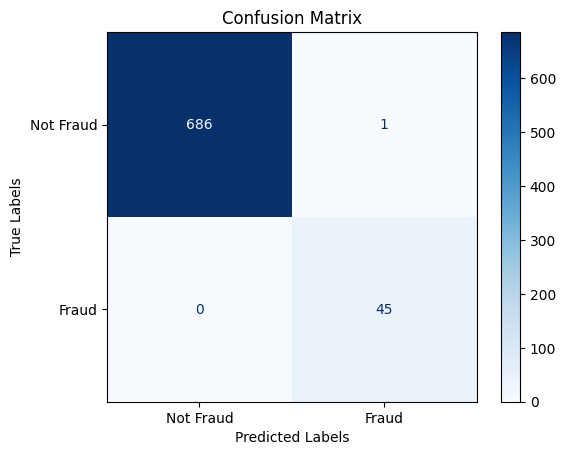

In [58]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming predictions and true_labels are already defined
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix without grid
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.grid(False)  # This line turns off the grid

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


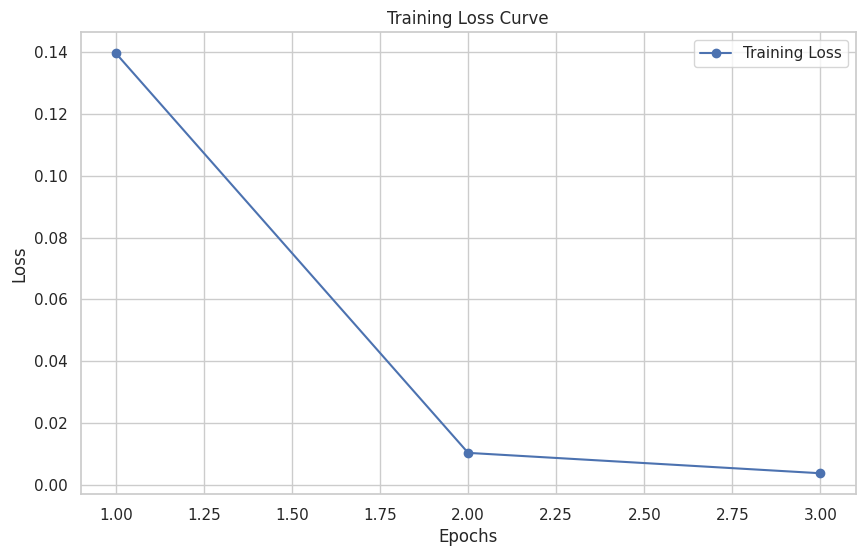

In [59]:
# Training loss 

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `train_metrics` is already defined
train_loss = [log['loss'] for log in train_metrics if 'loss' in log]

# Plot the training loss
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, marker='o', label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()


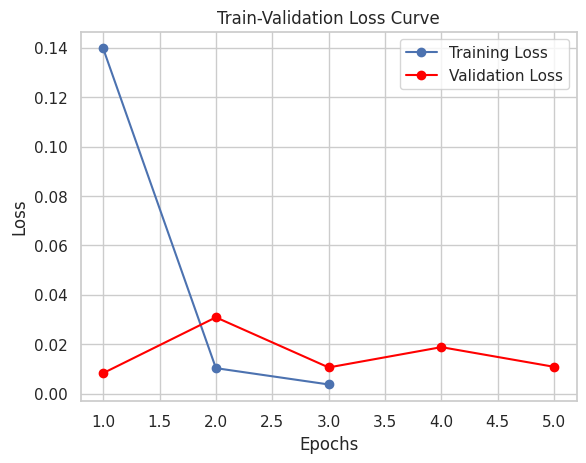

In [60]:
# Train-Validation Curve

val_loss = [log['eval_loss'] for log in train_metrics if 'eval_loss' in log]
plt.plot(range(1, len(train_loss) + 1), train_loss, marker='o', label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, marker='o', label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train-Validation Loss Curve")
plt.legend()
plt.show()

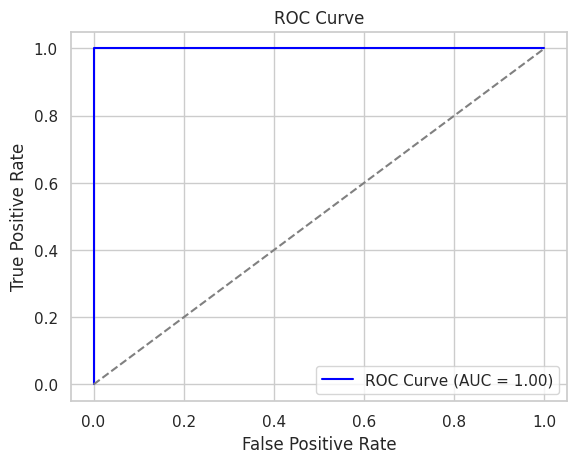

In [61]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
predicted_probabilities = predictions.predictions[:, 1]
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()